# Basic Statistics

## Data

In statistics, a **variable** is an attribute of an object of study, also called **cases**.

Data is generally divided into two categories, **quantitative data** and **categorical data**.

**Categorical variables** represent **groupings** (sometimes as numbers). There are three types of categorical variables: **binary**, **nominal**, and **ordinal** variables.

* **Binary variables** represent Yes/No values, e.g. heads/tails in a coin flip.
* **Nominal variables** are groups with no rank or order, e.g. colors, species names.
* **Ordinal variables** are groups that are ranked in a specific order, e.g. scaled responses in a survey, finishing place in a race.


**Quantitative variables** represents **amounts** that can be added, subtracted, divided, etc. There are two types of quantitative variables, **discrete** and **continuous**.

* **Discrete Variables** are counts of individual items or values, e.g. number of students in a class or number of different tree species in a forest.
* **Continuous variables** (aka **ratio variables**) are measurements of continuous values, e.g. age, height or distance.

## Levels of Measurement

Levels of measurement tell you **how precisely variables are recorded**:

* **Nominal**: the data can only be categorized
* **Ordinal**: the data can be categorized and ranked
* **Interval**: the data can be categorized, ranked, and evenly spaced
* **Ratio**: the data can be categorized, ranked, evenly spaced, and has a natural zero.

## Data Matrix

A data matrix is the source of your statistical analysis: **rows** represent the **cases**, the objects of interest and **columns** represet the **variables**, the attributes of your objects. The values are called **observations**.

### Example Data

In this example our **cases** are persons and our **variables** are height (interval data), weight (interval data), age (interval data) and gender (nominal data).

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n = 100

var_height = 10 ** 2           # variance of 'height'
mean_height = 170

var_weight = 8 ** 2            # variance of 'weight'
mean_weight = 85

cov = 72                       # covaraince between 'height' and 'weight'
cov_matrix = [[var1, cov],
              [cov, var2]]

df = pd.DataFrame(np.round(np.random.multivariate_normal([mean_height, mean_weight], cov_matrix, n), decimals=1), columns=['height', 'weight'])

df['age'] = np.random.randint(20, 31, n)                                          # discrete uniform distribution
df['gender'] = ['M' if x == 0 else 'F' for x in np.random.randint(0, 2, n)]       # discrete uniform distribution

df

,height,weight,age,gender
0,179.9,99.2,20,M
1,171.4,89.1,29,M
2,163.1,76.9,24,F
3,171.5,88.0,26,M
4,179.7,89.5,30,F
...,...,...,...,...
95,156.6,76.8,30,F
96,159.2,75.4,30,M
97,156.2,72.4,29,M
98,167.9,86.4,22,F


## Descriptive Statistics

If you want to present your analyses to other people, you make use of **summaries** of your data.

### Frequency Tables

Frequency tables show how data is **distributed** over the cases.

For **categorial data** this is done by summing up observations with the same value:

In [52]:
s = pd.crosstab(index=df['gender'], columns='observations')
s['percent'] = np.round(s / s.sum(), decimals=2)
s

col_0,observations,percent
gender,,
F,51,0.51
M,49,0.49


**Quantitative data** can be encoded to **categorial data** (with a lost of information).

In [53]:
df['height_bins'] = pd.cut(x=df['height'], bins=[130, 139, 149, 159, 169, 179, 189, 199])
df['weight_bins'] = pd.cut(x=df['weight'], bins=[50, 59, 69, 79, 89, 99, 109])

h = pd.crosstab(index=df['height_bins'], columns='observations')
h['percent'] = np.round(h / h.sum(), decimals=2)
h

col_0,observations,percent
height_bins,,
"(139, 149]",2,0.02
"(149, 159]",13,0.13
"(159, 169]",38,0.38
"(169, 179]",33,0.33
"(179, 189]",12,0.12
"(189, 199]",2,0.02


In [54]:
df

,height,weight,age,gender,height_bins,weight_bins
0,179.9,99.2,20,M,"(179, 189]","(99, 109]"
1,171.4,89.1,29,M,"(169, 179]","(89, 99]"
2,163.1,76.9,24,F,"(159, 169]","(69, 79]"
3,171.5,88.0,26,M,"(169, 179]","(79, 89]"
4,179.7,89.5,30,F,"(179, 189]","(89, 99]"
...,...,...,...,...,...,...
95,156.6,76.8,30,F,"(149, 159]","(69, 79]"
96,159.2,75.4,30,M,"(159, 169]","(69, 79]"
97,156.2,72.4,29,M,"(149, 159]","(69, 79]"
98,167.9,86.4,22,F,"(159, 169]","(79, 89]"


### Categorial Data

Using a **pie chart**, one can immediatelly see **percentage**. Using a **bar chart**, one can easily retrieve **exact numbers**. A bar chart has advantanges in favor of a pie chart if the nuber of categories increases.

The **center of a distribution** can be described by the **mode**. Teh mode is the value which appears **most frequently** (can immediatelly been seen using a pie-chart). There can be multiple modes.

In [56]:
df.mode()

,height,weight,age,gender,height_bins,weight_bins
0,152.7,80.1,23.0,F,"(159.0, 169.0]","(79.0, 89.0]"
1,159.9,NaN,NaN,NaN,NaN,NaN
2,162.7,NaN,NaN,NaN,NaN,NaN
3,164.3,NaN,NaN,NaN,NaN,NaN
4,165.4,NaN,NaN,NaN,NaN,NaN
5,165.6,NaN,NaN,NaN,NaN,NaN
6,166.9,NaN,NaN,NaN,NaN,NaN
7,170.2,NaN,NaN,NaN,NaN,NaN
8,170.4,NaN,NaN,NaN,NaN,NaN
9,171.4,NaN,NaN,NaN,NaN,NaN


### Quantitative Data

For a small sample, use a **dotplot**, for many observations, use a **histogram**.

The **center of a distribution** can be described by the **median** or the **mean**. 

#### Median

The median is the middle value of your observations when they are ordered from the smallest to the largest. Use the median if you have outliers. 

In [57]:
df.median()

height    167.75
weight     84.15
age        25.00
dtype: float64

#### Mean

The **mean** $\mu$ or $\overline{x}$ is the sum of all the values divided by the number of observation ${x_1, x_2, ..., x_N}$ (sample size):

$$\mu = \overline{x} = \frac{1}{N}\displaystyle\sum_{i=1}^{N} x_i$$

In [58]:
df.mean()

height    168.133
weight     84.089
age        25.120
dtype: float64

#### Standard Deviation

The **variance** is 

$$\text{var}(X) = s^2 = \frac{1}{N-1}\displaystyle\sum_{i=1}^{N} \left( x_i - \overline{x} \right)^2$$

and the **standard deviation** $\sigma$ is 

$$\sigma = \sqrt{s}$$

The differences of the mean from the actual values are squared to prevent positive and negative deviations from neutralizing each other. As a result, the unit of the **variance** is squared which may result in a bad interpretation, e.g. the variance of a length is an area. Therefore we use the square-root of the variance as **standard variation** in order to have correct dimensions.

In [59]:
df.var()

height    86.415567
weight    52.965231
age        9.924848
dtype: float64

In [60]:
df.std()

height    9.295997
weight    7.277722
age       3.150373
dtype: float64

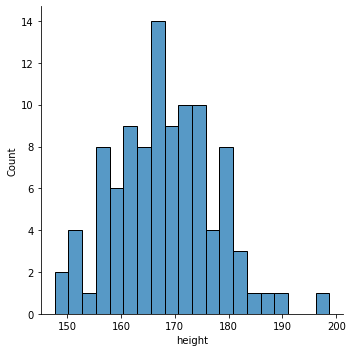

In [61]:
sns.displot(df.height, bins=20);

#### Standardization with z-Score

In order to find out if a **specific observation** is **common** or **exceptional**, we calculate the **z-score** or **standard score**:

$$z = \frac{x-\mu}{\sigma}$$

The **relative deviation** is normalized to the standard deviation with $\mu = 0$ and $\sigma = 1$.

If the histogram of your variable is bell shaped, then

* **68%** of the observations fall between z-scores **-1** and **1**
* **95%** between z-scores of **-2** and **2**
* **99%** between z-scores of **-3** and **3**

This means that for a bell shaped distribution, **a z-score of more than 3 or less than -3** can be conceived of as rather **exceptional**.

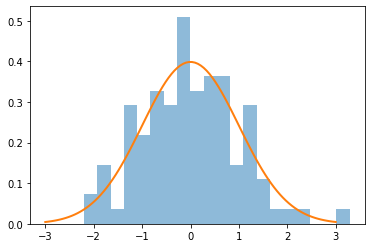

In [62]:
from scipy.stats import norm

mu = df.height.mean()
sigma = df.height.std()
z = (df.height - mu) / sigma
plt.hist(z, bins=20, alpha=0.5, density=True)

x = np.linspace(-3, 3, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, linewidth=2);

A rule that applies to any distribution regardless of its shape shape, is that 

* **75%** of the data must lie within a z-score of **±2**
* **89%** within a z-score of **±3**.

So in itself a z-score gives you, to a certain extent, information about how extreme an observation is.

#### Interquartile Range

The **variability of a distribution** can be described by the **range**. The range is the difference between the highest and the lowest value. 

More feasible for describing the variability is the **interquartile range**, as it leaves out the extreme values. the interquartile range divides your distribution into **four equal parts**. The three dividers are called first quartile $\text{Q1}$, second quartile $\text{Q2}$ and third quartile $\text{Q3}$. 

The **second quartile** $\text{Q2}$is the same as the **median** of your sample.

The **interquartile range** $\text{IQR} = \text{Q3} - \text{Q1}$ is not affected by outliers.

As a rule of thumb, observations can be qualified as **outliers** if

$$x_{LO} < \text{Q1} - 1.5 \cdot \text{IQR} \quad \text{or} \quad x_{RO} > \text{Q3} + 1.5 \cdot \text{IQR}$$

#### Box Plot

The box plot is very useful for describing center and variability, and detecting outliers.

The box plot shows you at a glance

* the **maximum** value that is not an outlier, 
* $\text{Q3}$,
* $\text{Q2}$ or the **mean**,
* $\text{Q1}$,
* the **minimum** value that is not an outlier,
* the **outliers**

In [63]:
df.height.describe()

count    100.000000
mean     168.133000
std        9.295997
min      147.700000
25%      161.250000
50%      167.750000
75%      173.500000
max      198.700000
Name: height, dtype: float64

In [64]:
# filter outliers in a data series
h = df.height
iqr = h.quantile(0.75) + h.quantile(0.25)
lo = h.quantile(0.25) - 1.5 * iqr
ro = h.quantile(0.75) + 1.5 * iqr


h_without_outliers = h[(h > lo) & (h < ro)]
h_outliers = h[(h <= lo) | (h >= ro)]
h_outliers

Series([], Name: height, dtype: float64)

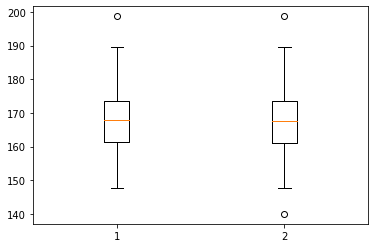

In [65]:
heights = df.height.append(pd.Series([140], index=[100]))  # add a artifical outlier
plt.boxplot([df.height, heights]);

The length of the box represents the $\text{IQR}$. The horizontal line inside the box is the median or in other words, $\text{Q2}$.

## Correlation and Regression

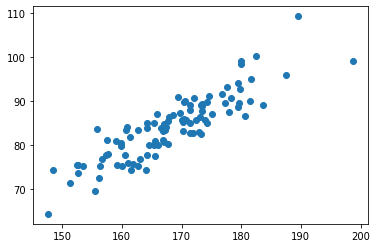

In [66]:
plt.scatter(df['height'], df['weight']);

### Covariance

The **sample covariance** is a measure of the joint variability of **two random variables** $x$ and $y$:

$$
\text{cov}(X,Y) = \frac{1}{n-1} \sum{(x-\hat{x})(y-\hat{y})}
$$

The covariance is **positive** if the variables tend to show **similar linear behavior**. The covariance is **negative** if the variables tend to show **opposite linear behavior**. The covaraince is **zero** if there is **no linear relationship** between the variables.

The covariance is **not normalized** and depend on the magnitudes of the variables, hence the magnitude is not easy to interpret.

### Covariance Matrix

The **diagonal** of the covariance matrix provides the **variance** $\text{var}(X)$ of each individual variables covariance itself. The **off-diagonal** entries in the matrix provide the **covariance** $\text{cov}(X, Y)$ between each variable pair.

A covariance matrix is **symmetric** ($A = A^{T}$) and **positive semidefinite** ($A \geq 0$: all eigenvalues are non negative).


In [67]:
df.loc[:, ['height', 'weight']].cov()

,height,weight
height,86.415567,59.431478
weight,59.431478,52.965231


### Correlation

The correlation coefficient is the **normalized** version of the covariance and shows by its magnitude the strength of the linear relation.



In [97]:
corrMatrix = df.loc[:, ['height', 'weight']].corr()
corrMatrix

,height,weight
height,1.000000,0.878466
weight,0.878466,1.000000


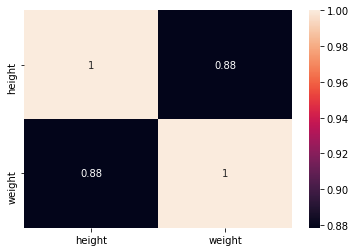

In [102]:
sns.heatmap(corrMatrix, annot=True);

### Pearson's r value

Pearson's r is a measure of how strongly the variables are correlated with each other.

### Regression

### r^2 value

### Contingency Table